Copyright &copy; 2015 Ondrej Martinsky, All rights reserved

[www.quantandfinancial.com](www.quantandfinancial.com)
# Principal Component Analysis (PCA)

In [1]:
from numpy import testing
from mpl_toolkits.mplot3d import Axes3D
%pylab
%matplotlib inline
seed(0)
class Eigen:
    def __init__(self,value,vector):
        self.value,self.vector=value,vector

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


## Load/Create Data

(3, 100)


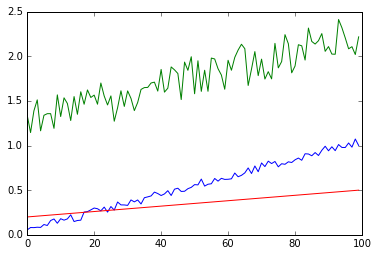

In [2]:
data = zeros((3,100))
data[0] = linspace(0,1,100) + rand(100)*0.1
data[1] = linspace(1,2,100) + rand(100)*0.5
data[2] = linspace(0.2,0.5,100)
plot(data.transpose());
print(data.shape)

## Calculate Correlation and Covariance Matrix $\Sigma$

#### Covariance matrix $\Sigma$

In [3]:
Sigma = cov(data)
print(Sigma)

[[ 0.08241935  0.07541586  0.0251183 ]
 [ 0.07541586  0.08911996  0.02334904]
 [ 0.0251183   0.02334904  0.0077288 ]]


#### Correlation Matrix

In [4]:
Correlation = corrcoef(Sigma)
print(Correlation)

[[ 1.          0.95201736  0.99980609]
 [ 0.95201736  1.          0.95785949]
 [ 0.99980609  0.95785949  1.        ]]


## Calculate Eigenvalues and Eigenvectors

Eigenvalues is diagonal in matrix $\Lambda$

Eigenvectors $V$ are calculated in such way that matrix $\Lambda$ is as much "diagonal" as possible. Eigenvalues are then on that diagonal and the other cells are as close to 0 as possible

$\Sigma = V\Lambda V'$

In [5]:
eig_vals, V = linalg.eig(Sigma)

### Eigen Values and Eigenvectors
Eigenvectors are columns in the matrix $V$

Eigenvalues are numbers from diagonal in matrix $\Lambda$

In [6]:
print(eig_vals)
print()
print(V)

[  1.68549069e-01   1.06571537e-02   6.18892395e-05]

[[-0.67799357 -0.68061157 -0.27765557]
 [-0.704953    0.70905721 -0.01670755]
 [-0.20824503 -0.18440652  0.96053539]]


### Determine eigenvectors with largest eigenvalues

In [7]:
eig_pairs = [Eigen(abs(eig_vals[i]), V.transpose()[i]) for i in range(len(eig_vals))]
for v in V:
    testing.assert_array_almost_equal(1.0, np.linalg.norm(v))
print("All eigenvectors have the same norm")
eig_pairs.sort(key=lambda x: x.value, reverse=True)
print()
print('Eigen values and eigen vectors in descending order')
for i, pair in enumerate(eig_pairs):
    print("[%i]   Value=%f, Vector=[%s]" % (i, pair.value, ",".join([str(x) for x in pair.vector])))
    print("      explains %f%% of variance" % (100 * pair.value / sum(eig_vals)))

All eigenvectors have the same norm

Eigen values and eigen vectors in descending order
[0]   Value=0.168549, Vector=[-0.677993565383,-0.704953000036,-0.208245031249]
      explains 94.020664% of variance
[1]   Value=0.010657, Vector=[-0.680611571144,0.709057209012,-0.184406517166]
      explains 5.944813% of variance
[2]   Value=0.000062, Vector=[-0.277655568151,-0.0167075458478,0.960535394135]
      explains 0.034523% of variance


Verify relationship $\Sigma = V \Lambda V'$

by calculating $\Lambda = V' * \Sigma * V$

In [8]:
Lambda = inv(V) * Sigma * V
print(Lambda)
print()
print(V * Lambda * inv(V))
print()
print(Sigma)

[[  3.78861359e-02   3.61844662e-02   1.45235023e-03]
 [  3.61844662e-02   4.48061417e-02   7.19379188e-05]
 [  1.45235023e-03   7.19379188e-05   7.13081210e-03]]

[[  1.74153199e-02   1.73612768e-02   8.39754602e-05]
 [  1.73612768e-02   2.25268311e-02   2.21639313e-07]
 [  8.39754602e-05   2.21639313e-07   6.57908865e-03]]

[[ 0.08241935  0.07541586  0.0251183 ]
 [ 0.07541586  0.08911996  0.02334904]
 [ 0.0251183   0.02334904  0.0077288 ]]


## Create Transformation Matrix
Select only those eigenvectors (columns) which have highest eigenvalues

In [9]:
dimensions = 2
transformation = matrix(hstack(pair.vector.reshape(-1,1) for pair in eig_pairs[:dimensions]))
print("Transformation matrix to %i dimensions " % transformation.shape[1])
print(transformation)

Transformation matrix to 2 dimensions 
[[-0.67799357 -0.68061157]
 [-0.704953    0.70905721]
 [-0.20824503 -0.18440652]]


## Transform Data

In [10]:
data2 = data.transpose() * transformation

## Display Data

In [11]:
print(data.transpose().shape)
print(data2.shape)

(100, 3)
(100, 2)


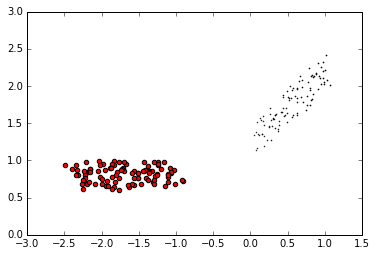

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
for point in asarray(data.transpose()):
    ax.scatter(*point,c='b')
for point in asarray(data2):
    ax.scatter(*point,c='r')